## Objective 
For this competition, you will be predicting a continuous target based on a number of feature columns given in the data. All of the feature columns, cat0 - cat9 are categorical, and the feature columns cont0 - cont13 are continuous.

## Results: Baseline model RMSE = .86330, linear regression

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Converting Categorical Features](#convert_categorical)
* [Oberservations & Feature Selection](#obs_feature_select)
* [Standardize Data](#stadardize_data)
* [Splitting the data into training and testing sets](#split_data)
* [Create and Train the Model](#train_model)
* [Model Evaluation](#model_eval)
* [Predictions from our Model](#predict)
* [Evaluation Metrics](#eval_metrics)
* [Predictions for Competition](#comp_pred)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

TRAINING DATA

In [86]:
df = pd.read_csv('train.csv',index_col='id')

In [7]:
df.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


TEST DATA

In [101]:
#import competition feature test set
test = pd.read_csv('test.csv', index_col='id')

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [87]:
train=df.drop(['target'],axis=1)

In [88]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
2,B,A,A,A,B,B,A,E,A,F,...,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
3,A,A,A,C,B,D,A,B,C,N,...,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
4,A,A,A,C,B,D,A,E,G,K,...,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
6,A,B,A,A,B,B,A,E,C,F,...,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


In [89]:
train_labels=df['target']

In [90]:
train_labels.head()

id
1    6.994023
2    8.071256
3    5.760456
4    7.806457
6    6.868974
Name: target, dtype: float64

In [21]:
#train.info()

In [26]:
#train.describe()

<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [142]:
train.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
train     0
dtype: int64

In [143]:
test.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
train     0
dtype: int64

In [130]:
train['cat6'].unique()

array(['A', 'B', 'D', 'C', 'E', 'I', 'G', 'H'], dtype=object)

In [129]:
test['cat6'].unique()

array(['A', 'B', 'C', 'D', 'E', 'I', 'H'], dtype=object)

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

<a class="anchor" id="convert_categorical"></a>
## Converting Categorical Features
Convert categorical features to dummy variables

Identify categorigal features and check cardinality

In [27]:
#Create array of only categorical (!= 'object') data types
all_cat_feats = train.columns[train.dtypes == "object"].values
print(all_cat_feats)

['cat0' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9']


**COMPARE CARDINALITY OF TRAIN AND TEST DATASETS**

In [99]:
#check cardinality of training features
#for i in all_cat_feats:
#    print(i, train[i].nunique(), test_values[i].nunique() )

In [102]:
#RETURN FEATURES WHEN CARDINATLITY DOES NOT MATCH B/W TRAIN & TEST DATA
for i in all_cat_feats:
    if train[i].nunique() != test[i].nunique():
        print(i)

cat6


**CARDINALITY DOES NOT MATCH; WE'LL COMBINE TRAIN & TEST DATA SETS PRIOR TO CONVERTING CATEGORICAL FEATURES, THEN SPLIT BACK OUT**

ADD A COLUMN TO BOTH DATASETS TO ID WHICH DATASET IT IS (1=TRAIN, 0 = TEST); WE'LL LATER USE THIS TO ID AND SPLIT DATASETS BACK OUT

In [131]:
train['train']=1
test['train']=0

COMBINE THE TRAIN & TEST DATASETS

In [132]:
combined = pd.concat([train,test])

ENCODE THE DESIRED FEATURE(S)

In [134]:
#When converting binary categorical features with pd.get_dummies, to avoid multicoliniarity need to drop column(s) before fitting model, 
CAT0 = pd.get_dummies(combined['cat0'],drop_first=True)
CAT1 = pd.get_dummies(combined['cat1'],drop_first=True)
CAT2 = pd.get_dummies(combined['cat2'],drop_first=True)
CAT3 = pd.get_dummies(combined['cat3'],drop_first=True)
CAT4 = pd.get_dummies(combined['cat4'],drop_first=True)
CAT5 = pd.get_dummies(combined['cat5'],drop_first=True)
CAT6 = pd.get_dummies(combined['cat6'],drop_first=True)
CAT7 = pd.get_dummies(combined['cat7'],drop_first=True)
CAT8 = pd.get_dummies(combined['cat8'],drop_first=True)
CAT9 = pd.get_dummies(combined['cat9'],drop_first=True)

DROP ORIGINALS FROM THE DATAFRAME

In [135]:
#drop original features from dataset
for i in all_cat_feats:
    combined.drop([i],axis=1,inplace=True)

ADD THE NEW ENCODED FEATURES WITH THE 'COMBINED' DATASET

In [136]:
#Add back in the dummy variable features
combined = pd.concat([combined,CAT0],axis=1)
combined = pd.concat([combined,CAT1],axis=1)
combined = pd.concat([combined,CAT2],axis=1)
combined = pd.concat([combined,CAT3],axis=1)
combined = pd.concat([combined,CAT4],axis=1)
combined = pd.concat([combined,CAT5],axis=1)
combined = pd.concat([combined,CAT6],axis=1)
combined = pd.concat([combined,CAT7],axis=1)
combined = pd.concat([combined,CAT8],axis=1)
combined = pd.concat([combined,CAT9],axis=1)

SPLIT BACK INTO SEPARATE TRAIN & TEST DATASETS

In [137]:
#split based on the 'train' column we created above to differentiate the datasets
train_df = combined[combined['train']==1]
test_df = combined[combined['train']==0]

#drop the 'train' id column
train_df.drop(['train'],axis=1,inplace=True)
test_df.drop(['train'],axis=1,inplace=True)

c:\users\devin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CHECK SHAPE OF DATASETS

In [138]:
train_df.shape

(300000, 60)

In [139]:
test_df.shape

(200000, 60)

CHECK CARDINALITY OF DATASETS

<a class="anchor" id="stadardize_data"></a>
## Standardize Data

In [38]:
from sklearn import preprocessing

In [39]:
scaler = preprocessing.StandardScaler()

In [144]:
scaler.fit(train_df)

StandardScaler()

In [145]:
X_scaled = scaler.transform(train_df)

In [146]:
type(X_scaled)

numpy.ndarray

In [147]:
#Converting numpy array to dataframe
X_scaled_df = pd.DataFrame(X_scaled, index=train_df.index, columns=train_df.columns) 

In [122]:
X_scaled_df.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,F,G,H,I,J,K,L,M,N,O
id,,,,,,,,,,,,,,,,,,,,,
1,1.945372,0.757938,-1.597601,-0.956673,-0.867238,1.609527,-0.294623,1.396184,1.978227,1.350628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.424682,-2.093075,-0.433193,1.675598,-0.862591,-0.295002,-0.686557,-0.867560,0.607739,0.093896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.013181,1.077375,0.052623,1.536759,-0.805777,1.752148,-0.565102,1.841928,1.841445,1.462334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.881067,1.126494,-1.451257,1.201160,1.566127,1.838425,0.522703,-0.237621,1.852684,1.311128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.188265,0.564033,0.260374,-0.385590,-0.878778,-0.542878,1.182729,-0.639198,-0.083184,-0.317379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

In [49]:
from sklearn.model_selection import train_test_split

In [148]:
X = X_scaled_df
y = train_labels

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

<a class="anchor" id="train_model"></a>
## Create and Train the Model

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lm = LinearRegression()

In [152]:
#fit to training data
lm.fit(X_train,y_train)

LinearRegression()

<a class="anchor" id="predict"></a>
## Predictions from our Model

In [153]:
#pass in data the model hasn't seen before (feature data set of our test data)
predictions = lm.predict(X_test)

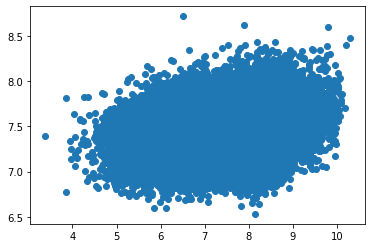

In [154]:
#compare predictions agains actual labels using a scatter plot, the more linear = the more accurate/correct predictions
plt.scatter(y_test,predictions)

**Residual Histogram**

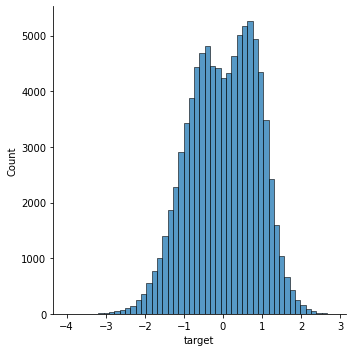

In [155]:
#create a histogram of the residuals (difference/error b/w actuals and predictions )

#if residuals are normally distributed (or approximate), then the model was the correct choice for the data; if not consider a different type of model
sns.displot((y_test-predictions),bins=50);

<a class="anchor" id="model_eval"></a>
## Model Evaluation

In [156]:
from sklearn import metrics

In [157]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7182973037162557
MSE: 0.7435925848912087
RMSE: 0.8623181459827972


<a class="anchor" id="comp_pred"></a>
## Predictions for Competition

Perform same preprocessing steps as on training data

**CONVERT CATEGORICAL**

ALREADY CONVERTED ABOVE, WITH TRAINING DATA

**STANDARDIZE DATA**

In [159]:
#use scaler fitted to the training data
X_scaled_tst = scaler.transform(test_df)
type(X_scaled_tst)

numpy.ndarray

In [160]:
#Converting numpy array to dataframe
X_scaled_tst = pd.DataFrame(X_scaled_tst, index=test_df.index, columns=test_df.columns) 

**MAKE PREDICTIONS WITH TEST DATA**

In [162]:
predict = lm.predict(X_scaled_tst)

In [163]:
np.array(predict).shape

(200000,)

In [166]:
predict

array([7.54649945, 7.88162887, 7.64705807, ..., 7.54836438, 7.47258413,
       7.19790938])

**CREATE DATAFRAME OF PREDICTIONS, WITH INDEX**

In [167]:
#name column(s) as desired
final_dataset = pd.DataFrame(
    {
        "target": predict[:],
    },
    index = test_df.index
)

In [168]:
final_dataset.shape

(200000, 1)

In [169]:
final_dataset.head()

,target
id,
0,7.546499
5,7.881629
15,7.647058
16,7.506547
17,7.324410


**CREATE SUBMISSION FILE**

Import the provided sample_submission.csv to use as a template to create your submission file:

In [170]:
submission_format = pd.read_csv('sample_submission.csv', index_col='id')

In [172]:
submission_format.columns

Index(['target'], dtype='object')

In [173]:
my_submission = pd.DataFrame(data=final_dataset,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [174]:
my_submission.head()

,target
id,
0,7.546499
5,7.881629
15,7.647058
16,7.506547
17,7.324410


In [175]:
my_submission.to_csv('baseline.csv')